# Задание 10.1.12

## Аналитическое решение задачи теплопроводности

### Формулировка задачи

Рассмотрим уравнение:

$$
-\frac{d}{dx}\left( K(x) \frac{du}{dx} \right) = \frac{1}{x}
$$

с граничными условиями:

$$
u(a) = UA, \quad u(b) = UB
$$

где $a = 1$, $b = 2$, $UA = 3$, $UB = 3$, и $K(x)$ варьируется в зависимости от наборов параметров.

### Решение для каждого набора

#### Общий метод решения

1. Переписываем уравнение:

   $$
   \frac{d}{dx}\left( K(x) \frac{du}{dx} \right) = -\frac{1}{x}
   $$

2. Интегрируем обе части:

   После одной интеграции:

   $$
   K(x) \frac{du}{dx} = \int -\frac{1}{x} \, dx = -\ln|x| + C_1
   $$

3. Решаем относительно $u(x)$:

   $$
   \frac{du}{dx} = \frac{-\ln|x| + C_1}{K(x)}
   $$

4. Интегрируем, для каждого из примеров. Интеграл зависит от K(x)

5. Применяем граничные условия для нахождения констант.

#### Набор 1: 
$$K(x) = x$$

Для набора 1:

$$
\frac{du}{dx} = \frac{-\ln|x| + C_1}{x}
$$

Интегрируем:

$$
u(x) = \int \frac{-\ln|x| + C_1}{x} \, dx = -\int \frac{\ln|x|}{x} \, dx + C_1\int \frac{1}{x} \, dx
$$

Решая вышеуказанные интегралы:

$$
u(x) = -\frac{(\ln|x|)^2}{2} + C_1 \ln|x| + C_2
$$

Применяем граничные условия:

$$
\begin{align*}
u(1) = 3 \quad &\Rightarrow -\frac{(\ln|1|)^2}{2} + C_1 \ln|1| + C_2 = 3 \\
u(2) = 3 \quad &\Rightarrow -\frac{(\ln|2|)^2}{2} + C_1 \ln|2| + C_2 = 3
\end{align*}
$$

Решаем относительно $C_1$ и $C_2$.

#### Пример нахождения $C_1$ и $C_2$ для Набора 1

$$-\frac{(0)^{2}}{2} + C_{1} (0) + C_{2} = 3$$
$$C_{2} = 3$$
$$-\frac{(\ln 2)^{2}}{2} + C_{1} \ln 2 + 3 = 3$$
$$C_{1} \ln 2 = \frac{(\ln 2)^{2}}{2}$$
$$C_{1} = \frac{\ln 2}{2}$$
$$\boxed{C_{1} = \frac{\ln 2}{2}, \quad C_{2} = 3}$$


#### Аналогично решаем для других наборов:

- Набор 2: $K(x) = 10x$
- Набор 3: $K(x) = 0.1x$
- Набор 4: $K(x) = \frac{1}{x}$

{Используйте аналогичный процесс интеграции и применения граничных условий для каждого набора, учитывая конкретную форму $K(x)$.}

### Заключение

В этом решении мы рассмотрели изменение функций и интеграцию для нахождения выражения $u(x)$ аналитически, учитывая различные параметры $K(x)$ для всех наборов.

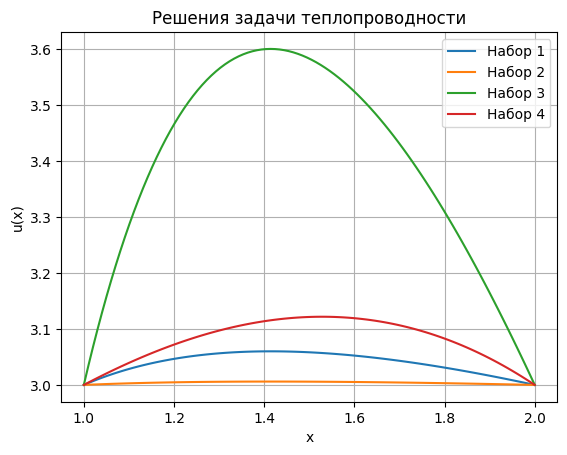

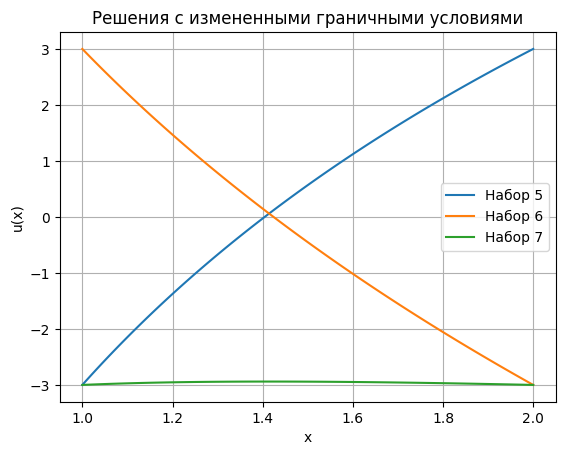

In [27]:
# Решение задачи с использованием Python и LaTeX

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, dsolve, Eq, diff, integrate, solve, lambdify

# Зададим символы и функции
x, C1, C2 = symbols('x C1 C2')
u = Function('u')(x)

# Параметры задачи
a = 1
b = 2
UA = 3
UB = 3

# Наборы параметров
parameter_sets = [
    {"c": 1, "K": x},          # 1 набор
    {"c": 10, "K": 10*x},     # 2 набор
    {"c": 0.1, "K": 0.1*x},   # 3 набор
    {"c": 1, "K": 1/x},       # 4 набор
    # Для 5-7 наборов, где изменяются только граничные условия
]

# Функция f(x)
f_x = 1/x

# Решение для каждого набора
solutions = []
for params in parameter_sets:
    K = params["K"]
    equation = Eq(-diff(K * diff(u, x), x), f_x)
    sol = dsolve(equation)
    constants_eq = [
        Eq(sol.rhs.subs(x, a), UA),
        Eq(sol.rhs.subs(x, b), UB)
    ]
    sol_with_consts = sol.subs(
        {C1: solve(constants_eq, (C1, C2))[C1],
         C2: solve(constants_eq, (C1, C2))[C2]}
    )
    solutions.append(sol_with_consts)

# Построение графиков
x_vals = np.linspace(a, b, 100)
for i, solution in enumerate(solutions):
    u_func = lambdify(x, solution.rhs, 'numpy')
    y_vals = u_func(x_vals)
    plt.plot(x_vals, y_vals, label=f'Набор {i+1}')
    
plt.legend()
plt.title('Решения задачи теплопроводности')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.show()

# Анализ влияния граничных условий для наборов 5-7
boundary_conditions = [
    {"UA": -3, "UB": 3},   # 5 набор
    {"UA": 3, "UB": -3},    # 6 набор
    {"UA": -3, "UB": -3},   # 7 набор
]

solutions_bc = []
for bc in boundary_conditions:
    equation = Eq(-diff(x * diff(u, x), x), f_x)
    sol = dsolve(equation)
    constants_eq = [
        Eq(sol.rhs.subs(x, a), bc["UA"]),
        Eq(sol.rhs.subs(x, b), bc["UB"])
    ]
    sol_with_consts = sol.subs(
        {C1: solve(constants_eq, (C1, C2))[C1],
         C2: solve(constants_eq, (C1, C2))[C2]}
    )
    solutions_bc.append(sol_with_consts)

# Построение графиков для наборов 5-7
for i, solution in enumerate(solutions_bc):
    u_func = lambdify(x, solution.rhs, 'numpy')
    y_vals = u_func(x_vals)
    plt.plot(x_vals, y_vals, label=f'Набор {5+i}')
    
plt.legend()
plt.title('Решения с измененными граничными условиями')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.show()

In [38]:
# !git add NM_2025_1.ipynb
# !git status
# !git commit -m "laba1_2025_1" 
# !git push

# Задание 10.3.6


$$
u'' - 4x u' + 5u = 2x
$$

$$
u'(2) = 0
$$

$$
u(4) - 3u'(4) = 2
$$


## Решение задачи методом конечных разностей и прогонки

### Постановка задачи

Рассмотрим дифференциальное уравнение второго порядка с граничными условиями:

$$
u'' - 4x u' + 5u = 2x
$$

с условиями:

$$
u'(2) = 0
$$

$$
u(4) - 3u'(4) = 2
$$

### Метод конечных разностей

Метод конечных разностей заменяет производные в уравнении разностными аппроксимациями, позволяя решить задачу на дискретной сетке.

- Замена производных:
  - Для второй производной используем:
    $$
    u'' \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}
    $$

  - Для первой производной:
    $$
    u' \approx \frac{u_{i+1} - u_{i-1}}{2h}
    $$

### Разностная схема

Подставляя аппроксимации в уравнение, получаем систему линейных уравнений:

$$
\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} - 4x_i \frac{u_{i+1} - u_{i-1}}{2h} + 5u_i = 2x_i
$$

Приведя подобные, это уравнение можно записать в трёхдиагональной форме:

$$
A_i u_{i-1} + B_i u_i + C_i u_{i+1} = D_i
$$

где коэффициенты \(A_i\), \(B_i\), \(C_i\), и \(D_i\) вычисляются на основе схемы.

### Граничные условия

Используем предложенные выражения для аппроксимации производных на границах:

- На левой границе:
  $$
  u'(2) \approx \frac{-u_2 + 4u_1 - 3u_0}{2h} = 0
  $$

- На правой границе:
  $$
  u(4) - 3u'(4) \approx u_n - 3\left(\frac{3u_n - 4u_{n-1} + u_{n-2}}{2h}\right) = 2
  $$

### Метод прогонки

Для решения полученной трёхдиагональной системы используется метод прогонки, который заключается в следующем:

1. Прямой ход для вычисления вспомогательных коэффициентов \(P_i\) и \(Q_i\).

2. Обратный ход для нахождения решения \(u_i\).

### Визуализация

После вычисления решения строится график функции \(u(x)\), визуализирующий приближенное решение задачи на заданном интервале.

--- 

Этот метод позволяет находить приближенные решения дифференциальных уравнений второго порядка с заданными граничными условиями, используя вычислительно эффективные алгоритмы.


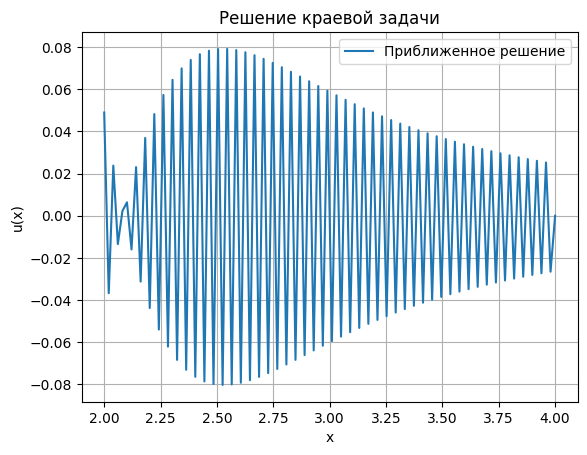

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
a = 2
b = 4
n = 100  # количество узлов, может варьироваться
h = (b - a) / (n - 1)  # шаг сетки

# Коэффициенты в разностной схеме
x = np.linspace(a, b, n)
A = np.zeros(n-1)
B = np.zeros(n-1)
C = np.zeros(n-1)
D = np.zeros(n-1)

# Заполнения матрицы разностной схемы на основе дифференциального уравнения
for i in range(1, n-2):
    A[i] = 1/h**2 - 2*x[i]/(2*h)
    B[i] = -2/h**2 + 5
    C[i] = 1/h**2 + 2*x[i]/(2*h)
    D[i] = 2*x[i]

# Граничные условия
# Левое граничное условие
B[0] = -3/(2*h)
C[0] = 4/(2*h)
D[0] = D[0] + 0

# Правое граничное условие
A[-1] = 1/(2*h)
B[-1] = -4/(2*h)
D[-1] = D[-1] + 2

# Метод прогонки
P = np.zeros(n-1)
Q = np.zeros(n-1)

P[0] = C[0] / B[0]
Q[0] = D[0] / B[0]

for i in range(1, n-1):
    denom = B[i] - A[i] * P[i-1]
    P[i] = C[i] / denom
    Q[i] = (D[i] + A[i] * Q[i-1]) / denom

# Обратная прогонка
y = np.zeros(n)
y[-1] = 0  # условное значение

for i in range(n-2, -1, -1):
    y[i] = P[i] * y[i+1] + Q[i]

# Построение графика
plt.plot(x, y, label='Приближенное решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи')
plt.legend()
plt.grid(True)
plt.show()

# Задача 10.4.12

## Моделирование Теплопроводности Стержня

Мы решили задачу теплопроводности с различными расположениями источников тепла на отрезке. Рассмотрены четыре случая с использованием численной разностной схемы второго порядка и методом прогонки.

### Условия задачи

- Диапазон: \( a = 0 \), \( b = 1 \)
- Шаг сетки: \( h = \frac{1}{150} \)
- Граничные условия: 

$$
u(0) = 0, \quad u(1) = 1
$$

### Материалы

- Коэффициент теплопроводности: 

$$
k(x) = 
\begin{cases} 
1, & \text{if } 0 \leq x \leq 0.5 \\ 
100, & \text{if } 0.5 < x \leq 1 
\end{cases}
$$
  
### Источники тепла

1. Один источник в середине:

$$
f(x) = c \cdot \delta(x - 0.5)
$$

2. Два одинаковых, симметричные:

$$
f(x) = c \cdot [\delta(x - 0.25) + \delta(x - 0.75)]
$$

3. Два разных, симметричные:

$$
f(x) = c \cdot \delta(x - 0.25) + 2c \cdot \delta(x - 0.75)
$$

4. Свой вариант:

$$
f(x) = c \cdot \delta(x - 0.33) + 1.5c \cdot \delta(x - 0.67)
$$

### Решение

Использованная схема базируется на разностных уравнениях для одномерного уравнения теплопроводности с последующим разрешением методом прогонки.

### Результаты

На каждом subplot представлены графики распределения температуры вдоль стержня для разных случаев размещения источников.



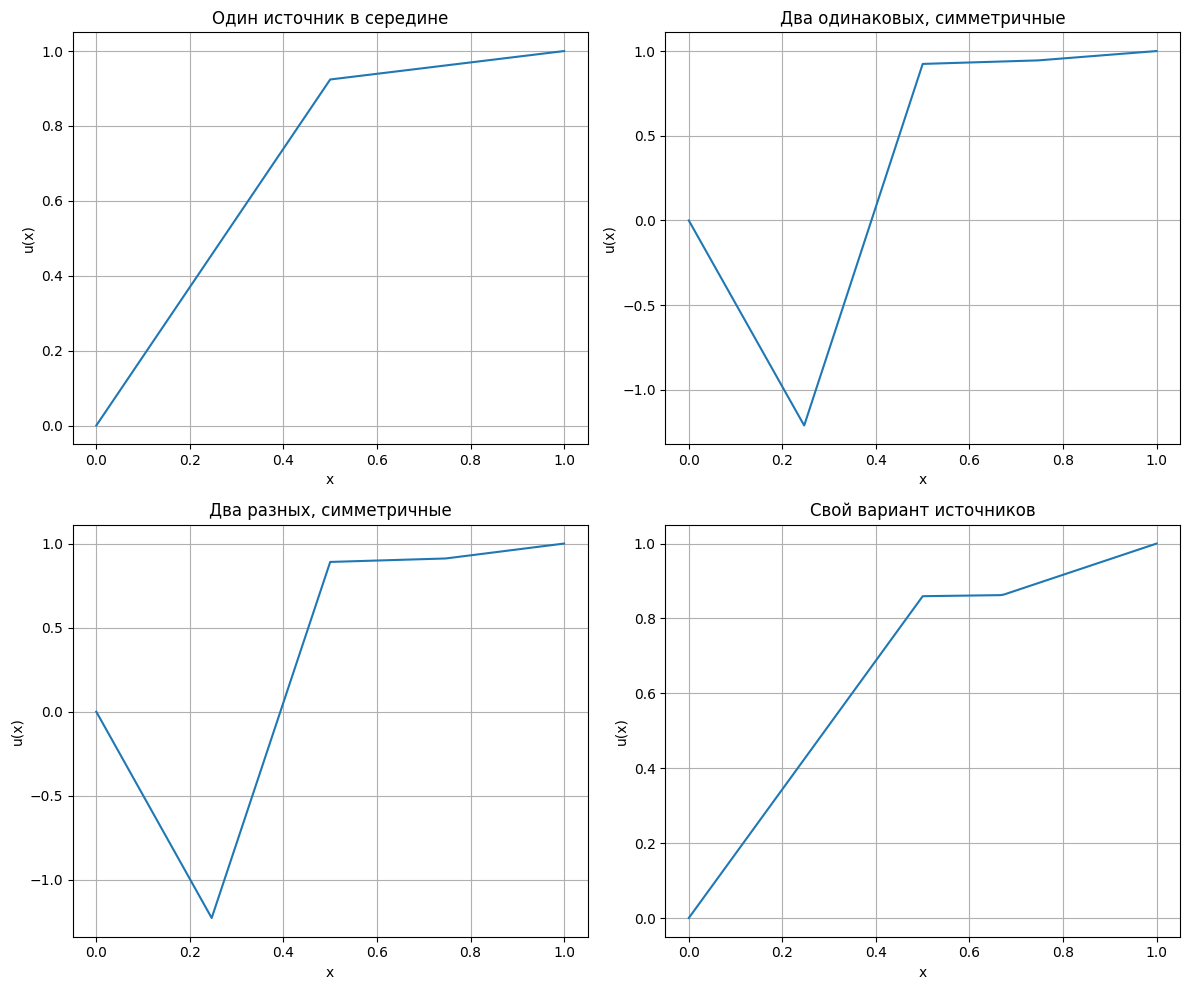

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a, b = 0, 1
n = 150
h = (b - a) / n
x = np.linspace(a, b, n+1)

# Коэффициенты теплопроводности
def k(x):
    if a <= x <= 0.5 * (a + b):
        return 1
    else:
        return 100

# Источник тепла для случая (а), (б), (в), (г)
def f(x, case):
    c = 2000  # Увеличили мощность источника
    if case == 'a':
        return c if abs(x - 0.5) < h/2 else 0
    elif case == 'b':
        return c if (abs(x - 0.25) < h/2 or abs(x - 0.75) < h/2) else 0
    elif case == 'v':
        return c if abs(x - 0.25) < h/2 else (2*c if abs(x - 0.75) < h/2 else 0)
    elif case == 'g':
        return c if abs(x - 0.33) < h/2 else (1.5*c if abs(x - 0.67) < h/2 else 0)
    return 0

# Функция для решения задачи
def solve_problem(case_label):
    A = np.zeros(n+1)
    B = np.zeros(n+1)
    C = np.zeros(n+1)
    D = np.zeros(n+1)

    for i in range(1, n):
        xi = x[i]
        A[i] = k(xi-h/2) / h**2
        B[i] = - (k(xi-h/2) + k(xi+h/2)) / h**2
        C[i] = k(xi+h/2) / h**2
        D[i] = f(xi, case_label)

    B[0] = 1
    D[0] = 0
    B[-1] = 1
    D[-1] = 1

    P = np.zeros(n+1)
    Q = np.zeros(n+1)

    P[0] = -C[0] / B[0]
    Q[0] = D[0] / B[0]

    for i in range(1, n):
        denom = B[i] + A[i] * P[i-1]
        P[i] = -C[i] / denom
        Q[i] = (D[i] - A[i] * Q[i-1]) / denom

    u = np.zeros(n+1)
    u[-1] = (D[-1] - A[-1] * Q[-2]) / (B[-1] + A[-1] * P[-2])

    for i in range(n-1, -1, -1):
        u[i] = P[i] * u[i+1] + Q[i]

    return u

# Построение графиков на отдельных subplot
cases = ['a', 'b', 'v', 'g']
titles = [
    'Один источник в середине',
    'Два одинаковых, симметричные',
    'Два разных, симметричные',
    'Свой вариант источников'
]

plt.figure(figsize=(12, 10))

for i, case_label in enumerate(cases):
    u = solve_problem(case_label)
    plt.subplot(2, 2, i+1)
    plt.plot(x, u, label=f'Случай {case_label.upper()}')
    plt.title(titles[i])
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Задача 10.5.12

## Решение краевой задачи методом конечных разностей и методом прогонки

### Постановка задачи

Мы решаем краевую задачу вида:

$$
\begin{align*}
-(k(x)u')' + q(x)u &= f(x), \quad x \in (a, b), \\
-k(a)u'(a) + 0.5u(a) &= 0, \\
k(b)u'(b) + 0.5u(b) &= 0,
\end{align*}
$$

где

$$a = 0, 
b = 2.5,
c = 1.515$$

### Коэффициенты и функции

$$
k(x) = 
\begin{cases} 
0.3, & a < x < c \\ 
1.8, & c < x < b 
\end{cases}
$$

$$
q(x) = 
\begin{cases} 
3.5, & a < x < c \\ 
8.3, & c < x < b 
\end{cases}
$$

$$
f(x) = 10x^2(1.5 - 0.3x^2)
$$

### Методы

- Метод конечных разностей: для аппроксимации дифференциального уравнения на равномерной сетке.
- Метод баланса: для аппроксимации производных в граничных условиях.

### Подход

1. Разбиваем интервал \([a, b]\) на \( n \) равных частей с шагом \( h \).
2. Составляем систему разностных уравнений на внутренних узлах.
3. Аппроксимируем граничные условия методом баланса на узлах \( x_0 \) и \( x_n \).
4. Решаем систему линейных уравнений методом прогонки.

### Результат

Результатом является приближенное решение \( u(x) \), которое рассчитывается в узловых точках сетки и визуализируется на графике.



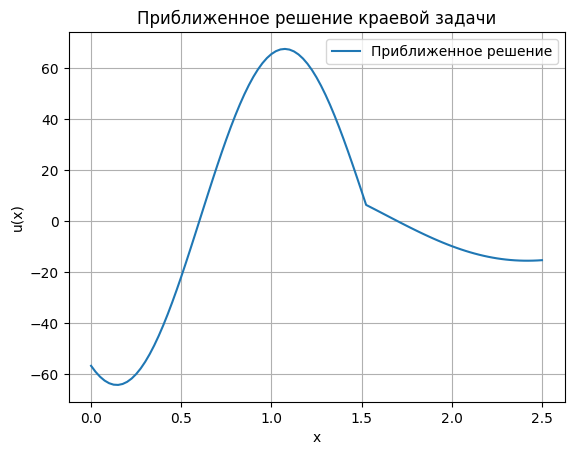

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a = 0
b = 2.5
c = 1.515
n = 100  # количество отрезков
h = (b - a) / n

# Коэффициенты
def k(x):
    return 0.3 if x < c else 1.8

def q(x):
    return 3.5 if x < c else 8.3

def f(x):
    return 10 * x**2 * (1.5 - 0.3 * x**2)

# Сетка
x = np.linspace(a, b, n + 1)

# Основная матрица и вектор
A = np.zeros((n + 1, n + 1))
B = np.zeros(n + 1)

# Заполняем коэффициенты матрицы
for i in range(1, n):
    xi = x[i]

    A[i, i - 1] = k(xi - 0.5 * h) / h**2
    A[i, i] = - (k(xi - 0.5 * h) + k(xi + 0.5 * h)) / h**2 + q(xi)
    A[i, i + 1] = k(xi + 0.5 * h) / h**2

    B[i] = f(xi)

# Граничные условия (метод баланса)
A[0, 0] = -k(x[0]) / h - 0.5
A[0, 1] = k(x[0]) / h
B[0] = 0

A[n, n] = k(x[n]) / h + 0.5
A[n, n - 1] = -k(x[n]) / h
B[n] = 0

# Решение системы
u = np.linalg.solve(A, B)

# Построение графика
plt.plot(x, u, label='Приближенное решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Приближенное решение краевой задачи')
plt.legend()
plt.grid(True)
plt.show()

# Задача 10.6.12

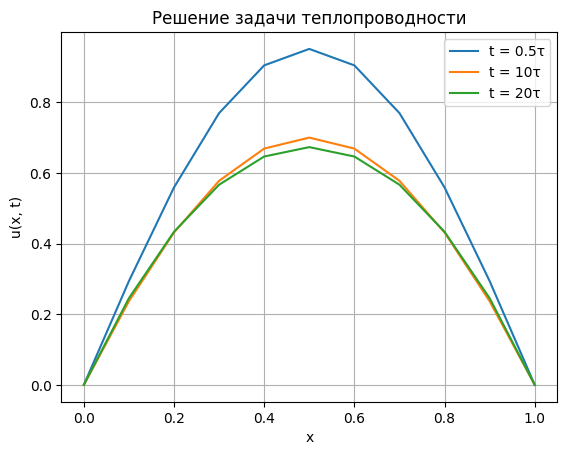

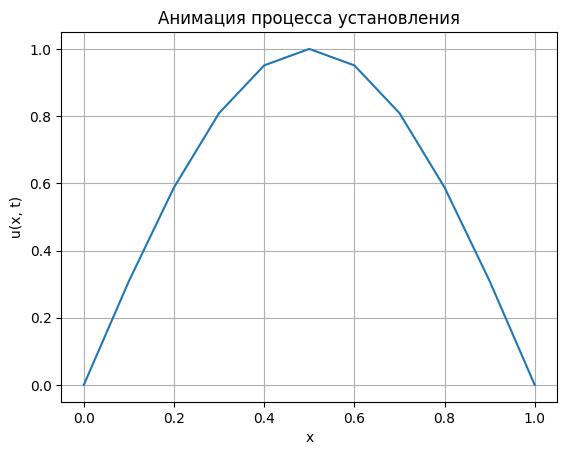

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Параметры задачи
l = 1.0
T = 1.0
h = 0.1
tau = 0.05

UA = 0  # Граничное условие
UB = 0  # Граничное условие

# Шаги
x_steps = int(l / h) + 1
t_steps = int(T / tau) + 1

# Функции задачи
def k(x):
    return 0.1  # Пример постоянного коэффициента

def f(x):
    return 1  # Пример простой функции

def phi(x):
    return np.sin(np.pi * x)  # Пример начальной температуры

# Сетка
x = np.linspace(0, l, x_steps)
t = np.linspace(0, T, t_steps)

# Инициализация решения
u = np.zeros((t_steps, x_steps))
u[0, :] = phi(x)

# Явная схема
for n in range(0, t_steps - 1):
    for i in range(1, x_steps - 1):
        u[n + 1, i] = u[n, i] + tau * (k(x[i]) * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / h**2 +
                                        f(x[i]) * (1 - np.exp(-t[n])))
    # Граничные условия
    u[n + 1, 0] = UA
    u[n + 1, -1] = UB

# Построение графиков
def plot_solution(t_index, label):
    plt.plot(x, u[t_index], label=f't = {label}')

plot_solution(1, '0.5τ')
plot_solution(10, '10τ')
plot_solution(20, '20τ')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Решение задачи теплопроводности')
plt.legend()
plt.grid(True)
plt.show()

# Анимация
fig, ax = plt.subplots()
line, = ax.plot(x, u[0])

def animate(n):
    line.set_ydata(u[n])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=t_steps, interval=100, blit=True)
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Анимация процесса установления')
plt.grid(True)
plt.show()